In [3]:
import numpy as np
import skimage.measure
from skimage.transform import rescale, rotate
# import pydicom
import vtk
from vtk.util import numpy_support
import os
import matplotlib.pyplot as plt
import cv2

In [ ]:
import gc
gc.collect()

# Read 3D slicer exported

In [2]:
# set working directory
plt.gray()
os.chdir('C:/Users/span/Documents/CNN/')

<Figure size 432x288 with 0 Axes>

In [3]:
def readdicomset(number1):
    # read dicom _dl_input
    PathDicom = "01_perprocess/"+str(number1)+'/'+str(number1)+"_orig/"
    # PathDicom = "01_perprocess/"+str(number1)+'/'+str(number1)+"_in/"
    reader = vtk.vtkDICOMImageReader()
    reader.SetDirectoryName(PathDicom)
    reader.Update()
    # Load dimensions using `GetDataExtent`
    _extent = reader.GetDataExtent()
    ConstPixelDims = [_extent[1]-_extent[0]+1, _extent[3]-_extent[2]+1, _extent[5]-_extent[4]+1]
    # Load spacing values
    ConstPixelSpacing = reader.GetPixelSpacing()
    # Get the 'vtkImageData' object from the reader
    imageData = reader.GetOutput()
    # Get the 'vtkPointData' object from the 'vtkImageData' object
    pointData = imageData.GetPointData()
    # Ensure that only one array exists within the 'vtkPointData' object
    assert (pointData.GetNumberOfArrays()==1)
    # Get the `vtkArray` (or whatever derived type) which is needed for the `numpy_support.vtk_to_numpy` function
    arrayData = pointData.GetArray(0)
    # Convert the `vtkArray` to a NumPy array
    ArrayDicom = numpy_support.vtk_to_numpy(arrayData)
    # Reshape the NumPy array to 3D using 'ConstPixelDims' as a 'shape'
    ArrayDicom = ArrayDicom.reshape(ConstPixelDims, order='F')
    return ArrayDicom

In [10]:
number1 = 33
a_in = readdicomset(number1)

In [11]:
from PIL import Image
from skimage.transform import rescale

path_master_i = "06_origdata/master_image_orig/"

resize1 = 256
a_in = np.where(a_in <= -1000, -999, a_in) 
# export master_image
for i in range(a_in.shape[2]):
    image = a_in[:, :, i].copy()
    image = skimage.transform.rotate(image,270,preserve_range=True)
#     image = gaussian(image,0.05,preserve_range=True)
    image = rescale(image, (resize1/a_in[:, :, i].shape[1]), preserve_range=True, anti_aliasing=False)
    image = (((image - a_in.min()) / (a_in.max() - a_in.min())) * 255.9).astype(np.uint8)
    img0 = Image.fromarray(image.astype(np.uint8))
    img0.save(path_master_i+str(number1)+"_image_"+str("{0:03}".format(i))+".png")

in the above code the astype(np.uint8) should only be used at last. The output image will be normal.
turn to 02_addedge3output for the master of orig_seg

# Split to train and val

In [4]:
# plt.gray()
os.chdir('C:/Users/span/Documents/CNN/')

In [5]:
# Split to train and val
path_master_i = "06_origdata/master_image_orig/"
path_master_s = "06_origdata/master_seg3channelfill/"

subfolder1 = "_0255/"
subfolder2 = "_seg3channelfill/"
path1 = "06_origdata/train_image"+subfolder1
path2 = "06_origdata/train_mask"+subfolder2
path3 = "06_origdata/val_image"+subfolder1
path4 = "06_origdata/val_mask"+subfolder2

In [7]:
import random
random.seed(a=1024, version=2)
backup1 = "02_data/master_image/"
list1 = os.listdir(backup1)
list2 = random.sample(list1, k=round(len(list1)*0.7))
list3 = [x for x in list1 if (x not in list2)]

In [9]:
from shutil import copy

for i in list2:
    copy(path_master_i+ str(i), path1+'image/')
    copy(path_master_s+ str(i), path2+'seg/')
    
for i in list3:
    copy(path_master_i+ str(i), path3+'image/')
    copy(path_master_s+ str(i), path4+'seg/')

In [11]:
# Val to val and test
from shutil import move

subfolder1 = "_0255/"
subfolder2 = "_seg3channelfill/"
path3 = "06_origdata/val_image"+subfolder1
path4 = "06_origdata/val_mask"+subfolder2

path5 = "06_origdata/test_image"+subfolder1
path6 = "06_origdata/test_mask"+subfolder2

random.seed(a=1024, version=2)
list1 = os.listdir(path3+'image/')
list2 = random.sample(list1, k=round(len(list1)*0.5))
list3 = [x for x in list1 if (x not in list2)]

In [12]:
for i in list3:
    move(path3+'image/'+ str(i), path5+'image/'+ str(i))
    move(path4+'seg/'+ str(i), path6+'seg/'+ str(i))

# Read from 10_Stain_DICOM_v3
The number of files is not match with the one exported from 3D slicer, so will use 3D slicer exported one.
Not really, the astype(np.uint8) should only be used at last

In [2]:
# set working directory
# plt.gray()
# os.chdir('C:/Users/span/Documents/CNN/')
os.chdir('C:/Users/span/Documents/MOSJ-TumorInjection/10_Stain_DICOM_v3')

In [3]:
list1 = os.listdir()

In [10]:
def readpatient(folderpath):
    subfolder1 = "/st000/se000"
    # read dicom _dl_input
    FileDicom = folderpath + subfolder1 +"/ct000.dcm"
    # PathDicom = "01_perprocess/"+str(number1)+'/'+str(number1)+"_in/"
    reader = vtk.vtkDICOMImageReader()
    reader.SetFileName(FileDicom)
    reader.Update()
    patname = reader.GetPatientName ()
    return patname

In [39]:
import pandas as pd
list2 = []
for i in range(len(list1)):
    list2.append([i,readpatient(list1[i])])

In [41]:
df = pd.DataFrame(list2, columns=['file','PatientName'])
df

,file,PatientName
0,0,03_20191022_c_0mgkg_r_ right
1,1,03_20191119_c_0mgkg_r_left
2,2,08_20191031_c_nohole_left
3,3,08_20191031_c_nohole_right
4,4,09_20190919_c_right_right
5,5,09_20190919_c_right_left
6,6,10_20190919_c_left_left
7,7,10_20190919_c_left_right
8,8,11_20191114_c_2_right_left
9,9,11_20191114_c_2_right_right


In [16]:
def readdicomset(folderpath):
    subfolder1 = "/st000/se000/"
    # read dicom _dl_input
    PathDicom = folderpath + subfolder1
    # PathDicom = "01_perprocess/"+str(number1)+'/'+str(number1)+"_in/"
    reader = vtk.vtkDICOMImageReader()
    reader.SetDirectoryName(PathDicom)
    reader.Update()
    # Load dimensions using `GetDataExtent`
    _extent = reader.GetDataExtent()
    ConstPixelDims = [_extent[1]-_extent[0]+1, _extent[3]-_extent[2]+1, _extent[5]-_extent[4]+1]
    # Load spacing values
    ConstPixelSpacing = reader.GetPixelSpacing()
    # Get the 'vtkImageData' object from the reader
    imageData = reader.GetOutput()
    # Get the 'vtkPointData' object from the 'vtkImageData' object
    pointData = imageData.GetPointData()
    # Ensure that only one array exists within the 'vtkPointData' object
    assert (pointData.GetNumberOfArrays()==1)
    # Get the `vtkArray` (or whatever derived type) which is needed for the `numpy_support.vtk_to_numpy` function
    arrayData = pointData.GetArray(0)
    # Convert the `vtkArray` to a NumPy array
    ArrayDicom = numpy_support.vtk_to_numpy(arrayData)
    # Reshape the NumPy array to 3D using 'ConstPixelDims' as a 'shape'
    ArrayDicom = ArrayDicom.reshape(ConstPixelDims, order='F')
    return ArrayDicom

In [ ]:
# 23 list1[23]
# 32 list1[31]
# 33 list1[33]

In [75]:
a_in = readdicomset(list1[33])

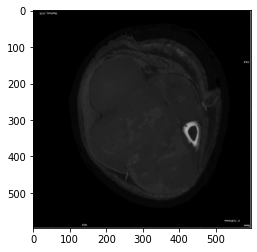

In [46]:
plt.gray()
image23 = skimage.transform.rotate(a_in[:,:,150],270)
plt.imshow(image23)

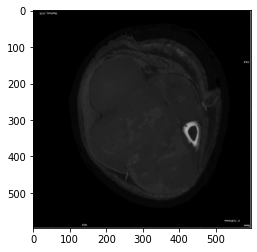

In [47]:
from skimage.filters import gaussian
image24 = gaussian(image23,0.05)
plt.imshow(image24)

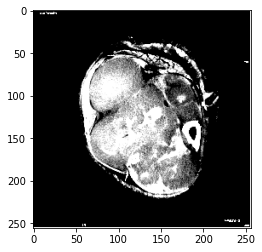

In [69]:
image = skimage.transform.rotate(a_in[:,:,150],270,preserve_range=True).copy()
image = rescale(image, (resize1/a_in[:, :, i].shape[1]), preserve_range=True, anti_aliasing=False)
image1 = gaussian(image,0.05,preserve_range=True)
img0 = Image.fromarray(image1)
plt.imshow(img0)

# Code.v2 export master folder

In [76]:
# output master folder for image and mask
from PIL import Image
from skimage.transform import rescale
from skimage.filters import gaussian

path_master_i = 'C:/Users/span/Documents/CNN/06_origdata/master_image_orig/'
number1 = 33
resize1 = 256

# export master_image
for i in range(a_in.shape[2]):
    image = skimage.transform.rotate(a_in[:,:,i],270,preserve_range=True).copy()
    image = gaussian(image,0.05,preserve_range=True)
    image = rescale(image, (resize1/a_in[:, :, i].shape[1]), preserve_range=True, anti_aliasing=False)
#     image = (((image - image.min()) / (image.max() - image.min())) * 255.9)
    img0 = Image.fromarray(image.astype(np.uint8))
    img0.save(path_master_i+str(number1)+"_image_"+str("{0:03}".format(i))+".png")

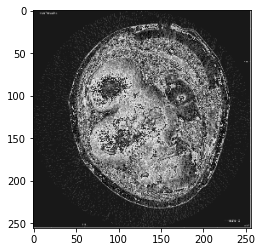

In [58]:
# read image
img22 = cv2.imread('C:/Users/span/Documents/CNN/06_origdata/master_image_orig/23_image_150.png')

# C:/Users/span/Documents/CNN/02_data/train_mask_re255/seg
# C:/Users/span/Documents/CNN/02_data/train_mask/23_train_mask/seg/

# img22.shape
# img22[150,:]
plt.imshow(img22)

In [ ]:
# output master folder for image and mask
from PIL import Image
from skimage.transform import rescale

path_master_s = "02_data/master_seg0255/"

resize1 = 256

# export master_seg0255
for i in range(a_mask.shape[2]):
    image = a_mask[:, :, i].astype(np.uint8).copy()
    image = rescale(image, (resize1/a_mask[:, :, i].shape[1]), anti_aliasing=False)
    image[image != 0] = 255
    img0 = Image.fromarray(image.astype(np.uint8))
    img0.save(path_master_s+str(number1)+"_image_"+str("{0:03}".format(i))+".png")

In [ ]:
# output master folder for image and mask
from PIL import Image
from skimage.transform import rescale
from scipy import ndimage as ndi

path_master_s = "02_data/master_seg0255fill/"

resize1 = 256

# export master_seg0255
for i in range(a_mask.shape[2]):
    image = a_mask[:, :, i].copy()
    image = ndi.binary_fill_holes(image).astype(np.uint8)
    image = rescale(image, (resize1/a_mask[:, :, i].shape[1]), anti_aliasing=False)
    image[image != 0] = 255
    img0 = Image.fromarray(image.astype(np.uint8))
    img0.save(path_master_s+str(number1)+"_image_"+str("{0:03}".format(i))+".png")

In [ ]:
# output master folder segre255
from PIL import Image
from skimage.transform import rescale
from scipy import ndimage as ndi

path_master_s2 = "02_data/master_segre255fill/"

resize1 = 256

# export master_segre255
for i in range(a_mask.shape[2]):
    image = a_mask[:, :, i].copy()
    image = ndi.binary_fill_holes(image).astype(np.uint8)
    image = rescale(image, (resize1/a_mask[:, :, i].shape[1]), anti_aliasing=False)
    image = (((image - image.min()) / (image.max() - image.min())) * 255.9).astype(np.uint8)
    img0 = Image.fromarray(image.astype(np.uint8))
    img0.save(path_master_s2+str(number1)+"_image_"+str("{0:03}".format(i))+".png")

In [ ]:
# clean up
backup1 = "02_data/master_image-backup/"

target1 = "02_data/master_image/"

listbc = os.listdir(backup1)
listta = os.listdir(target1)

def Diff(li1, li2):
    return (list(list(set(li1)-set(li2)) + list(set(li2)-set(li1))))

listdelete = Diff(listbc, listta)
for i in listdelete:
    os.remove(target1+str(i))

In [13]:
# read image
img22 = cv2.imread('C:/Users/span/Documents/CNN/06_origdata/master_seg3channelfill/23_image_125.png')

# C:/Users/span/Documents/CNN/02_data/train_mask_re255/seg
# C:/Users/span/Documents/CNN/02_data/train_mask/23_train_mask/seg/

img22.shape
img22[200,:]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0,

# Split to train and val

In [ ]:
plt.gray()
os.chdir('C:/Users/span/Documents/CNN/')

In [ ]:
# Split to train and val
path_master_i = "02_data/master_image/"
path_master_s = "02_data/master_seg0255/"

subfolder1 = "_0255/"
path1 = "02_data/train_image"+subfolder1
path2 = "02_data/train_mask"+subfolder1
path3 = "02_data/val_image"+subfolder1
path4 = "02_data/val_mask"+subfolder1

In [ ]:
import random
random.seed(a=1024, version=2)
list1 = os.listdir(path_master_i)
list2 = random.sample(list1, k=round(len(list1)*0.7))
list3 = [x for x in list1 if (x not in list2)]

In [ ]:
from shutil import copy

for i in list2:
    copy(path_master_i+ str(i), path1+'image/')
    copy(path_master_s+ str(i), path2+'seg/')
    
for i in list3:
    copy(path_master_i+ str(i), path3+'image/')
    copy(path_master_s+ str(i), path4+'seg/')

In [ ]:
path_master_s2 = "02_data/master_seg3channelfill/"
subfolder1 = "_seg3channelfill/"
path2 = "02_data/train_mask"+subfolder1
path4 = "02_data/val_mask"+subfolder1

In [ ]:
from shutil import copy

for i in list3:
    copy(path_master_s2+ str(i), path4+'seg/')
    
for i in list2:
    copy(path_master_s2+ str(i), path2+'seg/')

In [ ]:
# Val to val and test
from shutil import move

subfolder1 = "_0255/"
subfolder2 = "_seg3channelfill/"
path3 = "02_data/val_image"+subfolder1
path4 = "02_data/val_mask"+subfolder2

path5 = "02_data/test_image"+subfolder1
path6 = "02_data/test_mask"+subfolder2

random.seed(a=1024, version=2)
list1 = os.listdir(path3+'image/')
list2 = random.sample(list1, k=round(len(list1)*0.5))
list3 = [x for x in list1 if (x not in list2)]

In [ ]:
for i in list3:
    move(path3+'image/'+ str(i), path5+'image/'+ str(i))
    move(path4+'seg/'+ str(i), path6+'seg/'+ str(i))

# Code.v1 export separatly

In [ ]:
assert a_in.shape == a_mask.shape

In [ ]:
import random
random.seed(a=1024, version=2)
list1 = list(range(a_in.shape[2]))
trainlist1 = random.sample(list1, k=round(a_in.shape[2]*0.6))
testlist1 = [x for x in list1 if (x not in trainlist1)]

In [ ]:
for i in list2:
    os.replace(str(path3)+'image/'+ str(i), str(path1)+'image/'+ str(i))
    os.replace(str(path4)+'image/'+ str(i), str(path2)+'image/'+ str(i))

In [ ]:
from PIL import Image
from skimage.transform import rescale
# output  23_train_image
path1 = "02_data/train_image_re255/image/"
path3 = "02_data/val_image_re255/image/"

resize1 = 256

# output  23_train_image
for i in trainlist1:
    image = a_in[:, :, i].astype(np.uint8).copy()
    image = rescale(image, (resize1/a_in[:, :, i].shape[1]), anti_aliasing=False)
    image = (((image - image.min()) / (image.max() - image.min())) * 255.9).astype(np.uint8)
    img0 = Image.fromarray(image)
    img0.save(path1+str(number1)+"_taimage_"+str("{0:03}".format(i))+".png")
    
# output  23_test_image

for i in testlist1:
    image = a_in[:, :, i].astype(np.uint8).copy()
    image = rescale(image, (resize1/a_in[:, :, i].shape[1]), anti_aliasing=False)
    image = (((image - image.min()) / (image.max() - image.min())) * 255.9).astype(np.uint8)
    img0 = Image.fromarray(image)
    img0.save(path3+str(number1)+"_tsimage_"+str("{0:03}".format(i))+".png")

In [ ]:
from PIL import Image
from skimage.transform import rescale
# re255 rescale to 0 - 255

path2 = "02_data/train_mask_re255/seg/"
path4 = "02_data/val_mask_re255/seg/"

# output  23_train_mask

for i in trainlist1:
    image = a_mask[:, :, i].astype(np.uint8).copy()
    image = rescale(image, (resize1/a_in[:, :, i].shape[1]), anti_aliasing=False)
    image = (((image - image.min()) / (image.max() - image.min())) * 255.9).astype(np.uint8)
    img0 = Image.fromarray(image)
    img0.save(path2+str(number1)+"_taimage_"+str("{0:03}".format(i))+".png")


# output  23_train_mask

for i in testlist1:
    image = a_mask[:, :, i].astype(np.uint8).copy()
    image = rescale(image, (resize1/a_in[:, :, i].shape[1]), anti_aliasing=False)
    image = (((image - image.min()) / (image.max() - image.min())) * 255.9).astype(np.uint8)
    img0 = Image.fromarray(image)
    img0.save(path4+str(number1)+"_tsimage_"+str("{0:03}".format(i))+".png")

In [ ]:
# rescale to only 0 and 255

path2 = "02_data/train_mask_0255/seg/"
path4 = "02_data/val_mask_0255/seg/"
# output  23_train_mask

for i in trainlist1:
    image = a_mask[:, :, i].astype(np.uint8).copy()
    image = rescale(image, (resize1/a_in[:, :, i].shape[1]), anti_aliasing=False)
    image[image != 0] = 255
    img0 = Image.fromarray(image.astype(np.uint8))
    img0.save(path2+str(number1)+"_taimage_"+str("{0:03}".format(i))+".png")


# output  23_train_mask

for i in testlist1:
    image = a_mask[:, :, i].astype(np.uint8).copy()
    image = rescale(image, (resize1/a_in[:, :, i].shape[1]), anti_aliasing=False)
    image[image != 0] = 255
    img0 = Image.fromarray(image.astype(np.uint8))
    img0.save(path4+str(number1)+"_tsimage_"+str("{0:03}".format(i))+".png")

In [ ]:
import PIL.ImageOps
from PIL import Image
from skimage.transform import rescale
# output  23_train_image

path2 = "02_data/train_mask/23_train_mask/bg/"
path4 = "02_data/val_mask/23_test_mask/bg/"


# output  23_train_mask bg
for i in trainlist1:
    image = a_mask[:, :, i].astype(np.uint8).copy()
    image = rescale(image, (resize1/a_in[:, :, i].shape[1]), anti_aliasing=False)
    image = (((image - image.min()) / (image.max() - image.min())) * 255.9).astype(np.uint8)
    img0 = Image.fromarray(image)
    img0 = PIL.ImageOps.invert(img0)
    img0.save(path2+str(number1)+"_taimage_"+str("{0:03}".format(i))+".png")

# output  23_train_mask bg

for i in testlist1:
    image = a_mask[:, :, i].astype(np.uint8).copy()
    image = rescale(image, (resize1/a_in[:, :, i].shape[1]), anti_aliasing=False)
    image = (((image - image.min()) / (image.max() - image.min())) * 255.9).astype(np.uint8)
    img0 = Image.fromarray(image)
    img0 = PIL.ImageOps.invert(img0)
    img0.save(path4+str(number1)+"_tsimage_"+str("{0:03}".format(i))+".png")

In [ ]:
plt.gray()
os.chdir('C:/Users/span/Documents/CNN/')

In [ ]:
path1 = "02_data/train_image_0255/"
path2 = "02_data/train_mask_0255/"
path3 = "02_data/val_image_0255/"
path4 = "02_data/val_mask_0255/"

In [ ]:
import random
random.seed(a=1024, version=2)
list1 = os.listdir(str(path3)+'image/')
list2 = random.sample(list1, k=64)

In [ ]:
for i in list2:
    os.replace(str(path3)+'image/'+ str(i), str(path1)+'image/'+ str(i))
    os.replace(str(path4)+'image/'+ str(i), str(path2)+'image/'+ str(i))

In [ ]:
i1 = 25
i2 = 45
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(16, 6.4),
                                    sharex=True, sharey=True)
ax0.imshow(a_in[:, :, trainlist1[i1]], cmap='gray')
ax0.axis('off')
ax0.set_title('a in 1')
ax1.imshow(a_mask[:, :, trainlist1[i1]], cmap='gray')
ax1.axis('off')
ax1.set_title('a out 1')
ax2.imshow(a_in[:, :, trainlist1[i2]], cmap='gray') # 'magma'
ax2.axis('off')
ax2.set_title('a in 2')
ax3.imshow(a_mask[:, :, trainlist1[i2]], cmap='gray')
ax3.axis('off')
ax3.set_title('a out 2')

fig.tight_layout()
plt.show()

GENERATORS

CNN layer calculate 

In [ ]:
# [filter size, stride, padding]
#Assume the two dimensions are the same
#Each kernel requires the following parameters:
# - k_i: kernel size
# - s_i: stride
# - p_i: padding (if padding is uneven, right padding will higher than left padding; "SAME" option in tensorflow)
# 
#Each layer i requires the following parameters to be fully represented: 
# - n_i: number of feature (data layer has n_1 = imagesize )
# - j_i: distance (projected to image pixel distance) between center of two adjacent features
# - r_i: receptive field of a feature in layer i
# - start_i: position of the first feature's receptive field in layer i (idx start from 0, negative means the center fall into padding)

import math
convnet =   [[11,4,0],[3,2,0],[5,1,2],[3,2,0],[3,1,1],[3,1,1],[3,1,1],[3,2,0],[6,1,0], [1, 1, 0]]
layer_names = ['conv1','pool1','conv2','pool2','conv3','conv4','conv5','pool5','fc6-conv', 'fc7-conv']
imsize = 227

def outFromIn(conv, layerIn):
  n_in = layerIn[0]
  j_in = layerIn[1]
  r_in = layerIn[2]
  start_in = layerIn[3]
  k = conv[0]
  s = conv[1]
  p = conv[2]
  
  n_out = math.floor((n_in - k + 2*p)/s) + 1
  actualP = (n_out-1)*s - n_in + k 
  pR = math.ceil(actualP/2)
  pL = math.floor(actualP/2)
  
  j_out = j_in * s
  r_out = r_in + (k - 1)*j_in
  start_out = start_in + ((k-1)/2 - pL)*j_in
  return n_out, j_out, r_out, start_out
  
def printLayer(layer, layer_name):
  print(layer_name + ":")
  print("\t n features: %s \n \t jump: %s \n \t receptive size: %s \t start: %s " % (layer[0], layer[1], layer[2], layer[3]))
 
layerInfos = []
if __name__ == '__main__':
#first layer is the data layer (image) with n_0 = image size; j_0 = 1; r_0 = 1; and start_0 = 0.5
  print ("-------Net summary------")
  currentLayer = [imsize, 1, 1, 0.5]
  printLayer(currentLayer, "input image")
  for i in range(len(convnet)):
    currentLayer = outFromIn(convnet[i], currentLayer)
    layerInfos.append(currentLayer)
    printLayer(currentLayer, layer_names[i])
  print ("------------------------")
  layer_name = raw_input ("Layer name where the feature in: ")
  layer_idx = layer_names.index(layer_name)
  idx_x = int(raw_input ("index of the feature in x dimension (from 0)"))
  idx_y = int(raw_input ("index of the feature in y dimension (from 0)"))
  
  n = layerInfos[layer_idx][0]
  j = layerInfos[layer_idx][1]
  r = layerInfos[layer_idx][2]
  start = layerInfos[layer_idx][3]
  assert(idx_x < n)
  assert(idx_y < n)
  
  print ("receptive field: (%s, %s)" % (r, r))
  print ("center: (%s, %s)" % (start+idx_x*j, start+idx_y*j))